/Users/sahilbhardwaj/Desktop/UCL/Programming/Anaconda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/var/folders/n7/10c67z5x7f34c4lv0zkn_5m40000gn/T/ipykernel_94446/2395538189.py:48: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ).fit(
/Users/sahilbhardwaj/Desktop/UCL/Programming/Anaconda/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:210: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
/Users/sahilbhardwaj/Desktop/UCL/Programming/Anaconda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sahilbhardwaj/Desktop/UCL/Programming/Anaconda/

Best RMSE: 32357689480.828766
Best MAPE: 7.394147894322739
Best MAD: 27012772165.137493
Best parameters: {'damping_slope': 0.8, 'smoothing_level': 0.4, 'smoothing_seasonal': 0.2, 'smoothing_slope': 0.6}


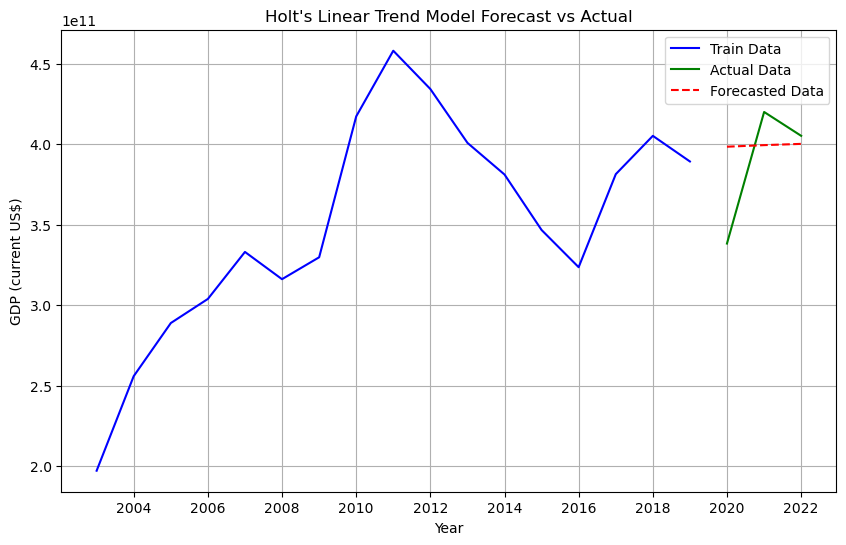

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import ParameterGrid

data = pd.read_csv('DATABEFOREPERCENTILE.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

data['Time'] = pd.to_datetime(data['Time'], format='%Y')
data.set_index('Time', inplace=True)

south_africa_data = data[data['Country Name'] == 'South Africa']

series = south_africa_data['GDP (current US$)']

train_data = series[:'2019']
validation_data = series['2020':]

param_grid = {
    'smoothing_level': [0.2, 0.4, 0.6, 0.8],
    'smoothing_slope': [0.2, 0.4, 0.6, 0.8],
    'damping_slope': [0.2, 0.4, 0.6, 0.8],
    'smoothing_seasonal': [0.2, 0.4, 0.6, 0.8]
}

best_rmse = float('inf')
best_mape = float('inf')
best_mad = float('inf')
best_params = None
best_model = None

for params in ParameterGrid(param_grid):
    try:
        model = ExponentialSmoothing(
            train_data, 
            trend='add', 
            damped_trend=True,
            seasonal=None
        ).fit(
            smoothing_level=params['smoothing_level'],
            smoothing_slope=params['smoothing_slope'],
            damping_slope=params['damping_slope'],
            smoothing_seasonal=params['smoothing_seasonal']
        )
        forecast = model.forecast(len(validation_data))
        rmse = np.sqrt(np.mean((validation_data - forecast) ** 2))
        mape = np.mean(np.abs((validation_data - forecast) / validation_data)) * 100
        mad = np.mean(np.abs(validation_data - forecast))
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_mape = mape
            best_mad = mad
            best_params = params
            best_model = model
    except:
        continue

print(f'Best RMSE: {best_rmse}')
print(f'Best MAPE: {best_mape}')
print(f'Best MAD: {best_mad}')
print(f'Best parameters: {best_params}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train Data', color='blue')
plt.plot(validation_data.index, validation_data, label='Actual Data', color='green')
plt.plot(validation_data.index, forecast, label='Forecasted Data', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.title('Holt\'s Linear Trend Model Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.savefig('holt_linear_trend_forecast_hyp.png')
plt.show()


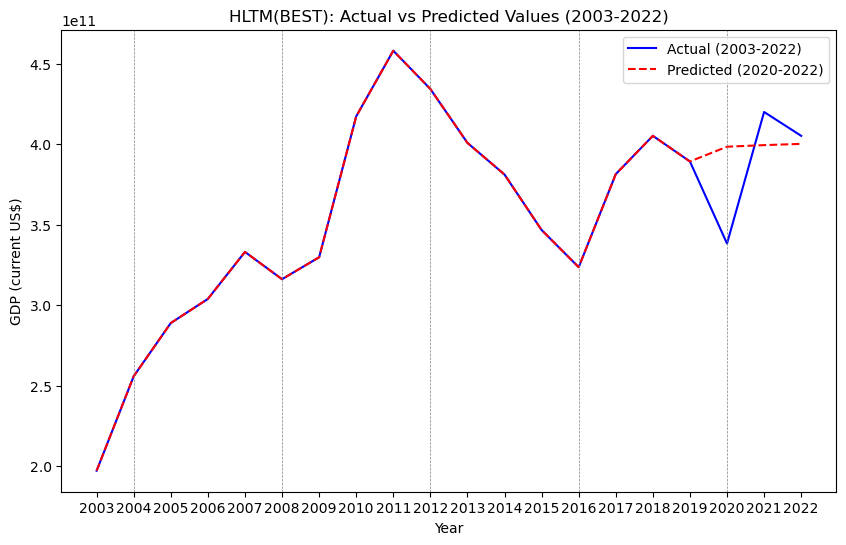

In [3]:
import matplotlib.pyplot as plt
import numpy as np

actual_values_HLTMHYP = south_africa_data.loc['2003':'2022', 'GDP (current US$)'].values

combined_values_HLTMHYP = np.concatenate([actual_values_HLTMHYP[:17], forecast])

years_actual = list(range(2003, 2023))
years_combined = list(range(2003, 2020)) + list(range(2020, 2023))

plt.figure(figsize=(10, 6))
plt.plot(years_actual, actual_values_HLTMHYP, label='Actual (2003-2022)', color='blue')
plt.plot(years_combined, combined_values_HLTMHYP, label='Predicted (2020-2022)', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.title('HLTM(BEST): Actual vs Predicted Values (2003-2022)')
plt.xticks(np.arange(2003, 2023, 1))
for year in range(2004, 2023, 4):
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=0.5)
plt.savefig('/Users/sahilbhardwaj/AA - PUSH VC/Dissertation Files/METHODOLOGY AND EVALS /Percentile and Scoring/EVALUATION - FORECASTING/plots/holts_actual_vs_predicted_HYP.png')
plt.show()
